**<h1 align="center" > Hotel Customer Segmentation</h1>**
**<h2 align="center" > Business Cases with Data Science - Case 1</h2>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

* [1. Data Exploration](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Initial Analysis](#sub-section-1_3)
        * [1.3.1. Types](#sub-section-1_3_1)
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)
    * [1.4. Individual Variable Analysis](#sub-section-1_4)
        * [1.4.1. Numerical Variables](#sub-section-1_4_1)
            * [1.4.1.1. Overview](#sub-section-1_4_1_1)
        * [1.4.2. Categorical Variables](#sub-section-1_4_2)
        * [1.4.3. Binary Variables](#sub-section-1_4_3)

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading Data

</a>

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
76241,76242,USA,75.0,368,0xD5B33825839A4B4EDF2A2F836DCF4663250A56DAE2FE...,0xA04ED55BAC3E919573B9102965149284436919BB86E5...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6158,6159,GBR,65.0,1253,0xC9BF079EFCCD2FDA0F6FE4919ED6A743E2591F98D61D...,0xE002CEBF3FE1C503D0F01043CFDD6AC19A2907D33603...,16,289.0,42.0,0,0,1,8,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
19090,19091,FRA,34.0,1055,0x985D675FD53F36F506C7599E3563CF92426D00A79B5E...,0x937B396F1020284D849B44F3ED913F11E9ADF858545B...,63,382.0,134.5,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,1,0,0,1,0,0,0,0,1
36497,36498,GBR,49.0,762,0x4021AF72E9F54F0BAC6B92D31C847930D57735966EBB...,0x704B689E7B0D17A9C9DA497BF5EF4A302DBA9183D23B...,7,536.0,44.0,0,0,1,4,4,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
57706,57707,SWE,64.0,507,0x39D8FE6BF9E51B2E7643F29487A80F66C721E78C5B19...,0xCF2949B88EB1957DB73F0DA7856ED73770266DC3162E...,173,384.0,115.5,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


<a class="anchor" id="sub-section-1_3">

## 1.3. Initial Analysis
    
</a>

<a class="anchor" id="sub-section-1_3_1">

### 1.3.1. Types
    
</a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

<a class="anchor" id="sub-section-1_3_2">

### 1.3.2. Missing Values
    
</a>

In [22]:
data.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

<a class="anchor" id="sub-section-1_3_3">

### 1.3.3. Duplicates
    
</a>

In [23]:
# Checking if we have duplicated IDs
data[data.index.duplicated() == True]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<a class="anchor" id="sub-section-1_3_4">

### 1.3.4. Data Statistics 
    
</a>

In [ ]:
# Maybe Separate even more
data_num = data.select_dtypes(exclude = object)
data_cat = data.select_dtypes(include = object)

In [26]:
data_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.03,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.83,85.12,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.85,379.13,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.68,123.58,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.20,2.30,0.0,0.0,2.0,3.0,185.00


In [27]:
data_cat.describe().T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


In [ ]:
# Separating binary columns
data_bin = data[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
                 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
                 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]
data_num = data_num.drop(columns=data_bin.columns)

<a class="anchor" id="sub-section-1_4">

## 1.4. Individual Analysis
    
</a>

**Objectives**
* Targeted Marketing: Develop tailored campaigns for specific customer groups to improve engagement and conversions.

* Personalised Offers: Create customized promotions and packages to boost satisfaction and loyalty.

* Service Customisation: Tailor amenities and services to meet the unique needs of different segments.

* Customer Retention: Retain high-value or loyal customers by addressing their preferences.

* Pricing Strategies: Implement dynamic pricing based on segment willingness to pay and booking behavior.

* Identify High-Value Segments: Focus on the most profitable customers to maximize revenue.

* Resource Allocation: Efficiently allocate resources (staff, budget, inventory) based on segment demand.

* Market Positioning: Refine the hotel’s market position using segmentation insights to attract the right customers.

* Competitive Advantage: Differentiate offerings to stand out in the market.

* Predictive Analytics: Use data to anticipate future customer behavior and trends for proactive decision-making.

<a class="anchor" id="sub-section-1_4_1">

### 1.4.1. Numerical Variables
    
</a>

<a class="anchor" id="sub-section-1_4_1_1">

#### 1.4.1.1. Overview
    
</a>

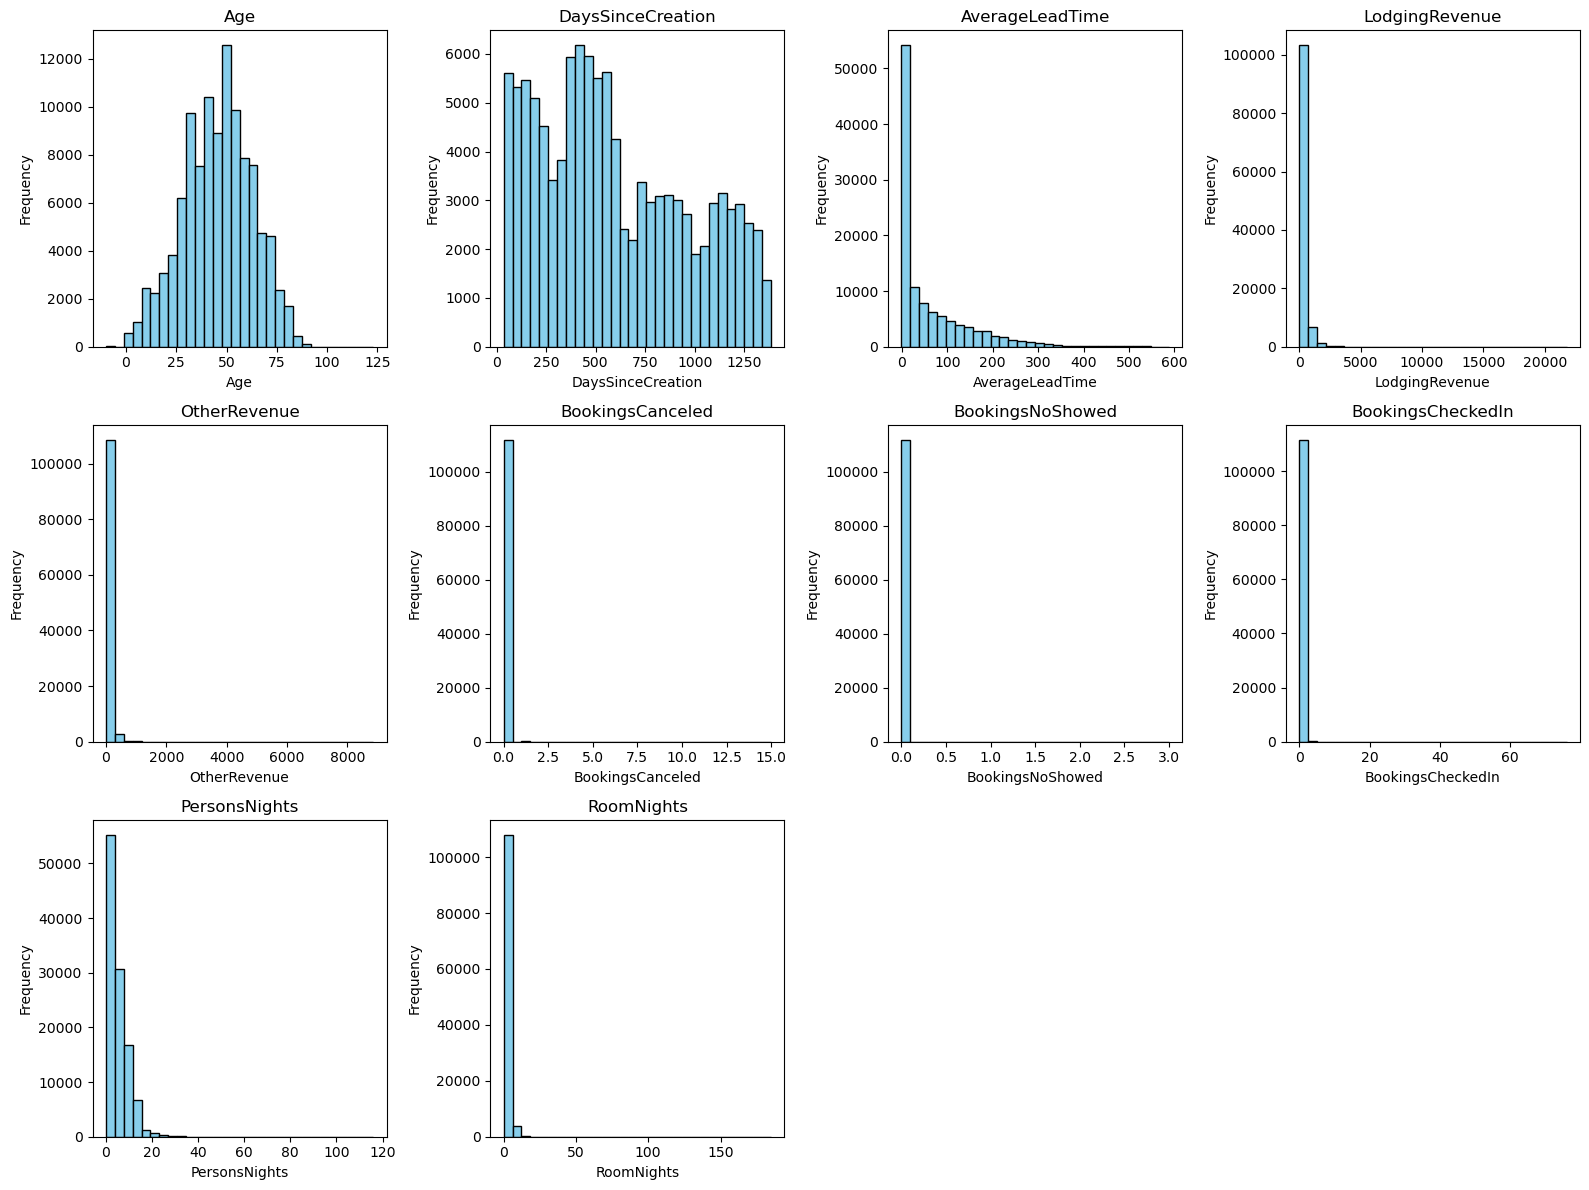

In [ ]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through numerical columns and create histograms
for i, col in enumerate(data_num):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


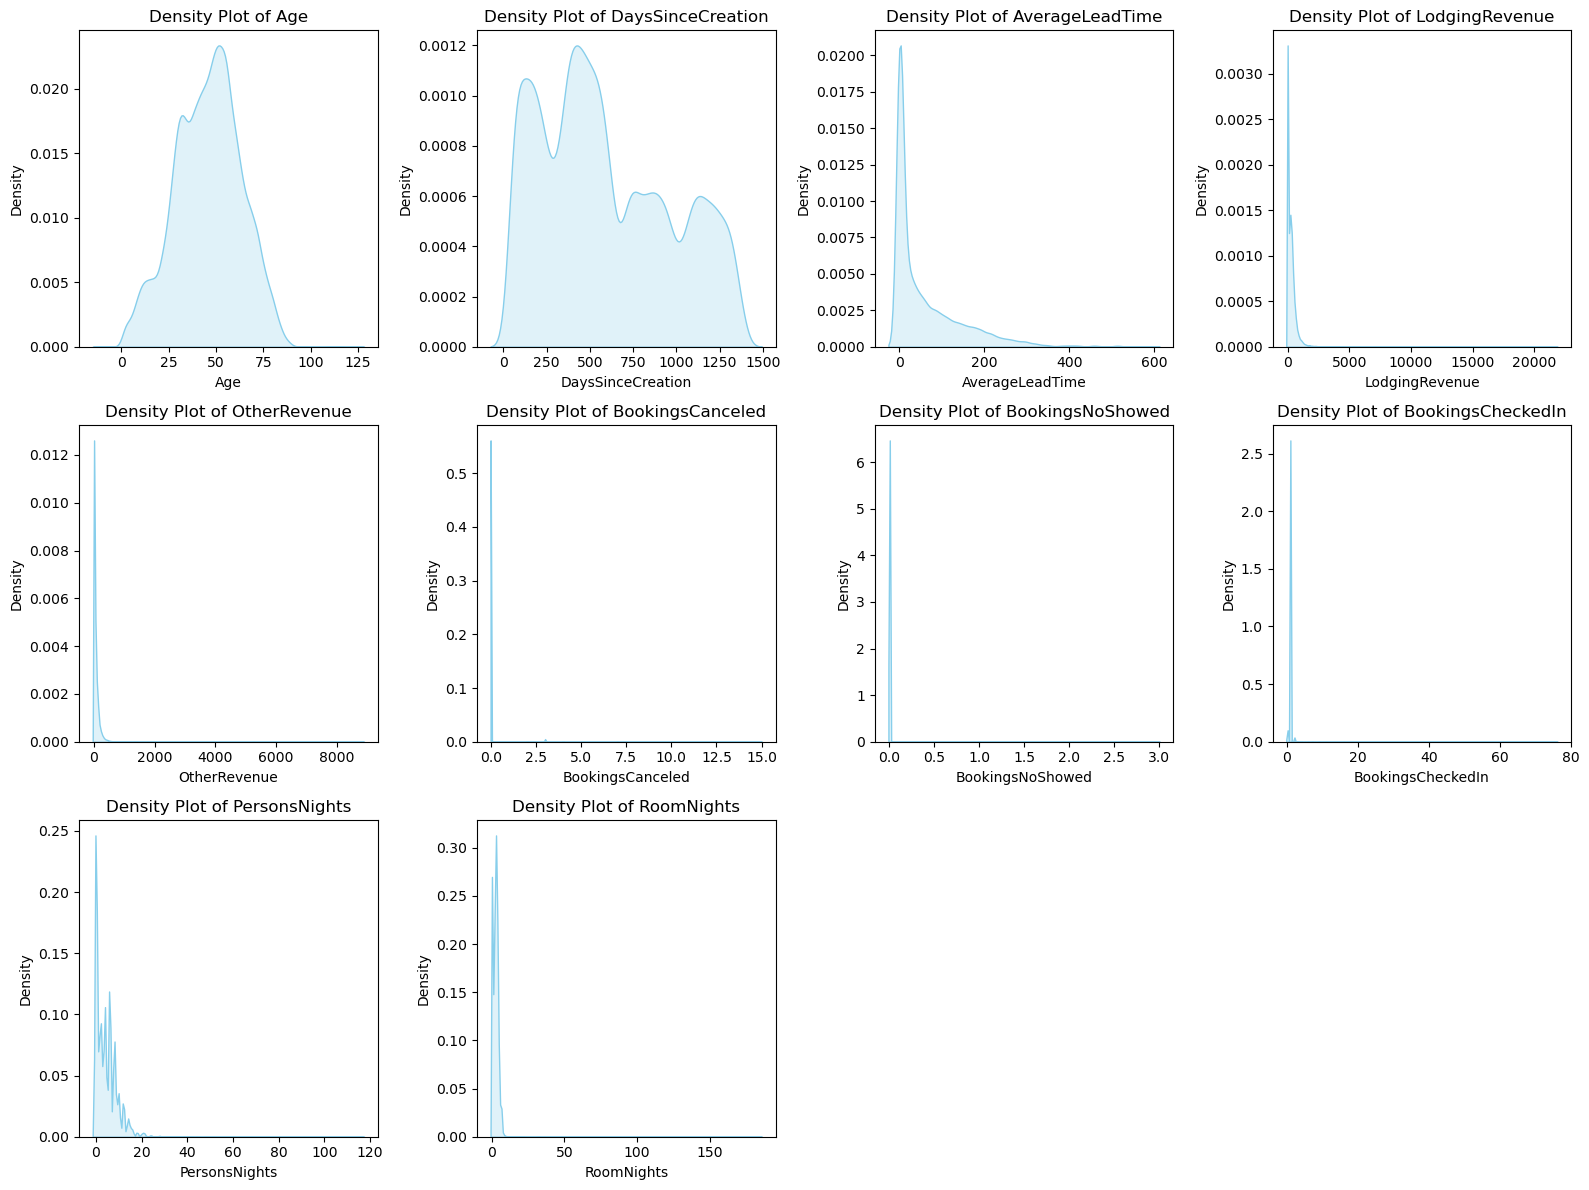

In [33]:
# Set up the grid layout (adjust rows/cols based on the number of features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make it easier to iterate

# Loop through numerical columns and plot KDE (density) for each
for i, col in enumerate(data_num):
    sns.kdeplot(data[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


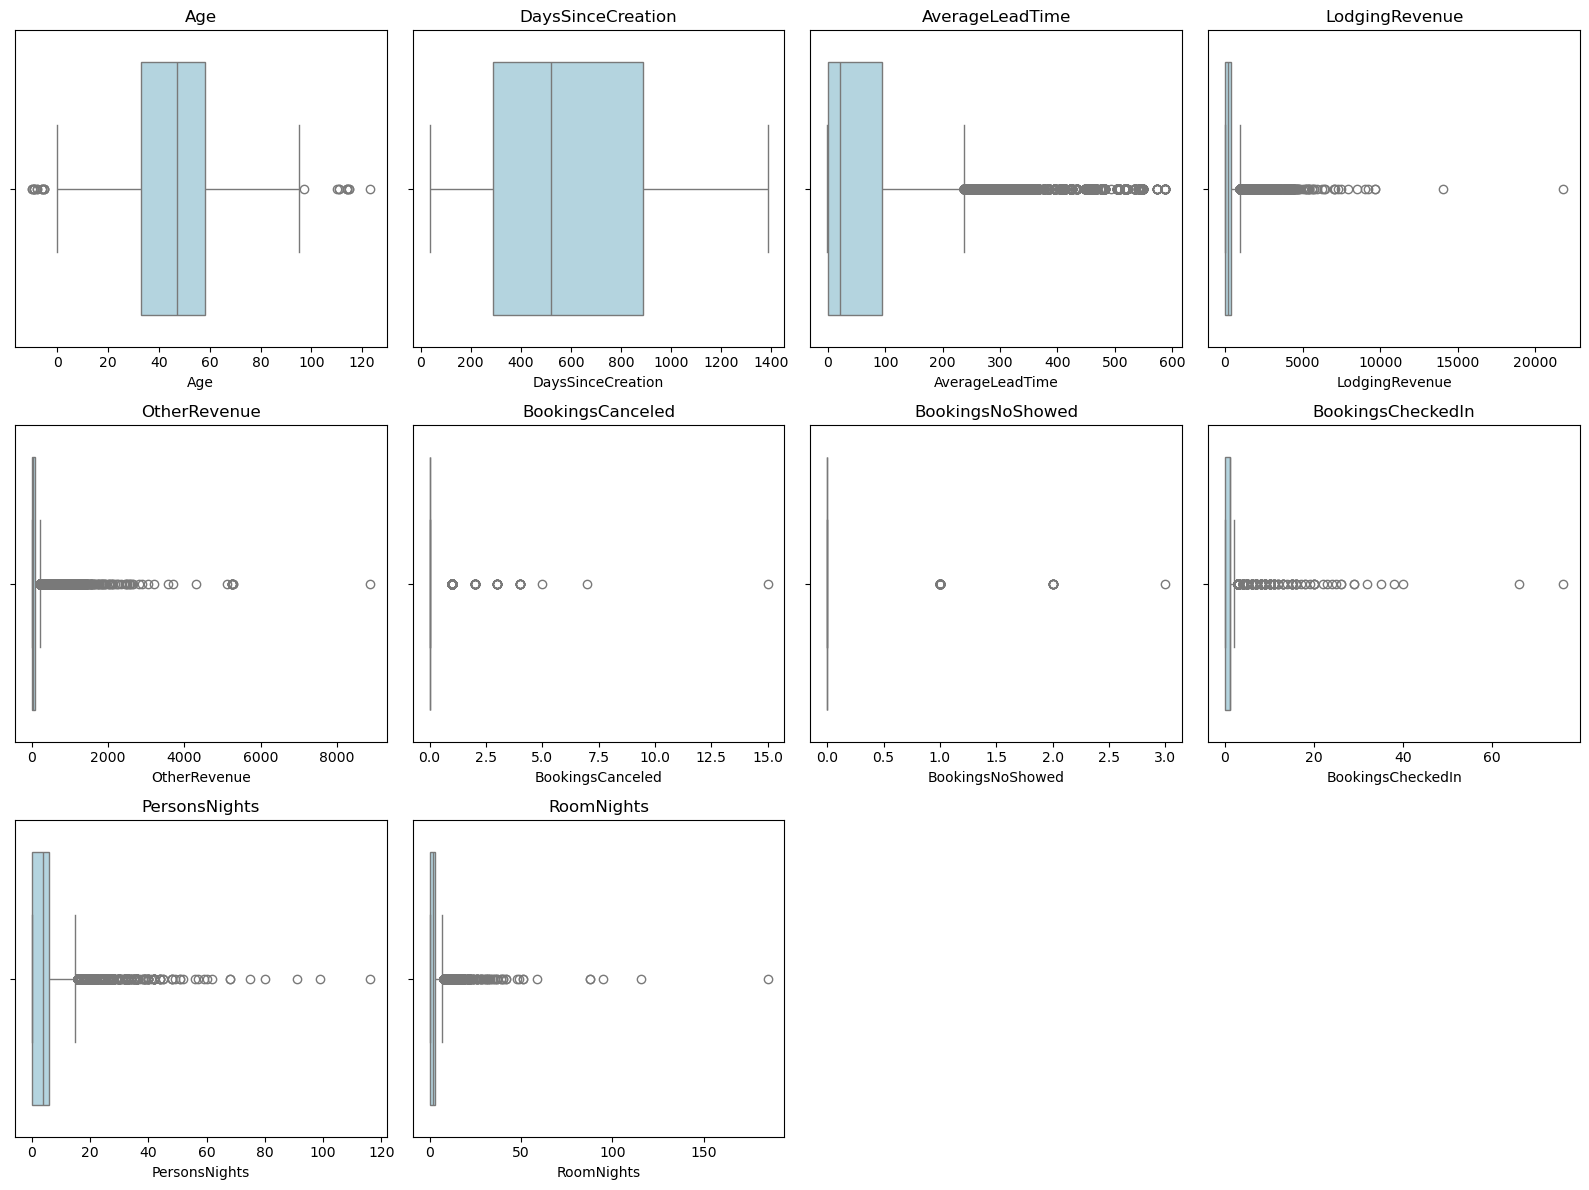

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_num):
    sns.boxplot(x=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [36]:

# Filter out rows where any numerical column has a value less than 0
data_cleaned = data[(data[data_num.columns] >= 0).all(axis=1)]

# Check the shape of the cleaned data to see how many rows are removed
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (111733, 28)
Cleaned data shape: (107535, 28)


<a class="anchor" id="sub-section-1_4_2">

### 1.4.2. Categorical Variables
    
</a>

<a class="anchor" id="sub-section-1_4_3">

### 1.4.3. Binary Variables
    
</a>

**Making a fusion with the low-high floor**

    If its on a low floor then 1 
    If its on a medium floor then 2
    If its on a high floor then 3

In [16]:
Check0 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check0

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [17]:
# We have 1 customer that usually asks fot a high and low floor but not medium and the same for the cases bellow
Check1 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26127,PRT,NaN,916,0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,74,506.25,92.5,0,0,1,15,5,Direct,Direct,1,1,0,0,0,0,0,1,0,0,0,0,1


In [18]:
Check2 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 1)]
Check2

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...,0xB524FBB5D5127698F6E182836043FBA8CCD397612416...,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,Other,1,0,0,1,0,0,0,1,0,0,0,0,0


In [19]:
Check3 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check3

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...,0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,Other,0,1,0,1,0,0,0,0,0,0,0,0,1


In [20]:
# This just means that the customer does not ask for a specific floor
Check4 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 0)]
Check4

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


Uncomment the code after we dealt with the costumers above and if everyone agrees

In [50]:
# def type_of_floor(row):
#     if row['SRLowFloor'] == 1:     # preference for lower floors
#         return 1
#     elif row['SRMediumFloor'] == 1: # preference for medium floors
#         return 2
#     elif row['SRHighFloor'] == 1:    # preference for higher floors
#         return 3
#     else:                           # no preference
#         return 0 



# data['SRFloor'] = data.apply(type_of_floor, axis=1)